In [1]:
import numpy as np
import ssid
import quakeio
from ssid import modal, spec
from utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE58658/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

In [3]:
data_conf = Config()

# # PAINTER RIO DELL TRANSVERSE (CASE 1)
# data_conf.inputs  = [17,3,20]
# data_conf.outputs = [9,7,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# HAYWARD TRANSVERSE (CASE 1)
title = "Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)"
data_conf.inputs  = [25,2,7,18]
data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL
# title = "Hayward Bridge Longitudinal Mode (In: Ch6, Out: Ch14)"
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]
# # HAYWARD LONGITUDINAL
# title = "Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)"
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`d`  | decimation (downsampling) factor

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`no` | number of observability parameters
`nc` | number of controllability parameters
`r ` | reduced model order

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`no` | number of steps used for identification (prediction horizon)

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.no = 190
conf.nc = 190
conf.r  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.2,1.6)
conf.damping = 0.06
conf.pseudo = True

../CESMD/CE58658/58658_002_20210623_17.15.07.P.zip
peak acceleration (cm/s/s): 908.091


/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/realize.py:191: RuntimeWarning: invalid value encountered in matmul
  Ryy = Yno@Yno.T/ns
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/realize.py:192: RuntimeWarning: invalid value encountered in matmul
  Ruu = Uno@Uno.T/ns


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.09014    -0.005441  1.0        0.6664     0.6664   
      0.08438    0.004613   6.649e-35  0.8373     5.568e-35
      0.0815     -0.004801  1.0        0.7854     0.7854   
      0.04404    0.0003415  2.048e-19  0.9972     2.043e-19
      0.04344    0.0008396  0.0        0.9956     0.0      
      0.02722    0.0004299  1.17e-21   0.9999     1.17e-21 
Mean Period(s): 0.061784781855331455
Standard Dev(s): 0.0243219606084961
../CESMD/CE58658/58658_003_20211002_12.22.00.P.zip
peak acceleration (cm/s/s): 872.494
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.07108    0.0001672  1.0        0.993      0.993    
      0.04272    0.006556   5.491e-49  0.9955     5.466e-49
      0.04216    0.002511   1.094e-09  0.9961     1.09e-09 
      0.03662    0.001699   4.98e-09   0.9968     4.964e-09
      0.02725    0.007153   9.487e-95  0.998      9.469e-95
      0.02718    0.0

Text(0.5, 0.98, 'Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)')

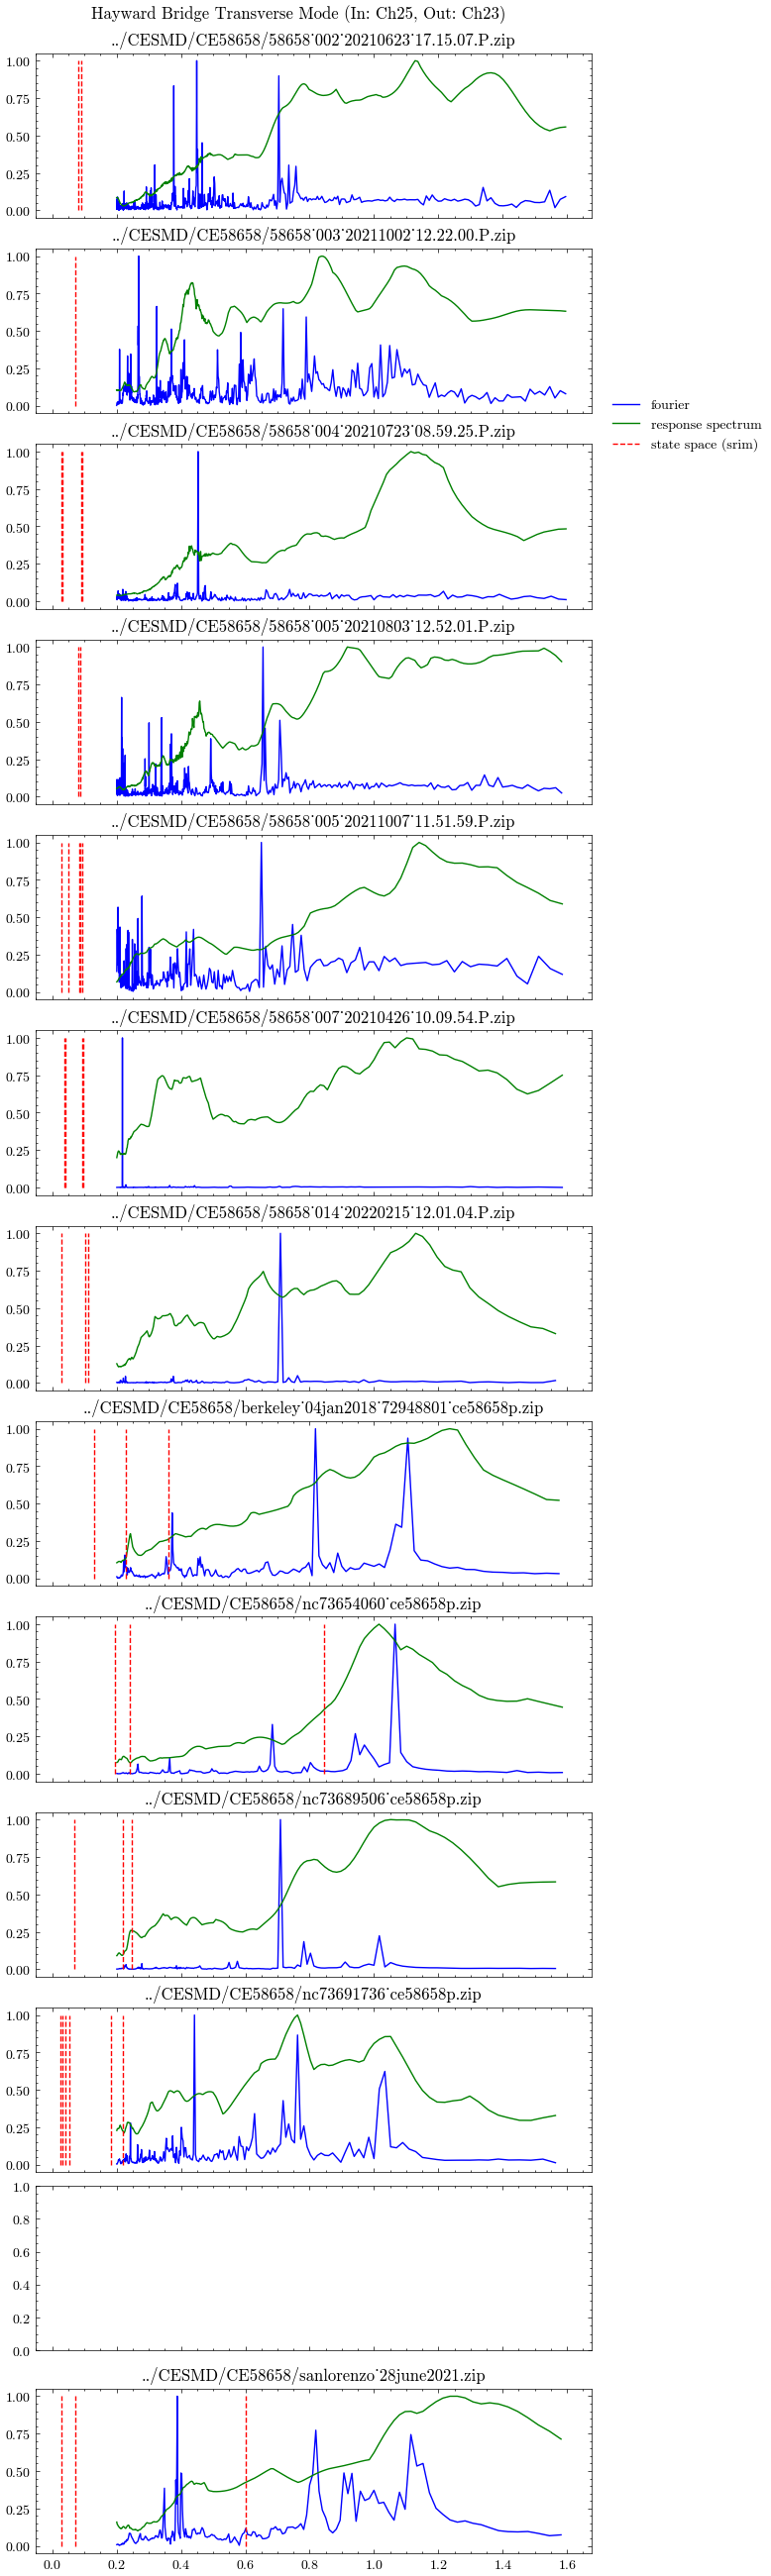

In [5]:
files = list(list_files(directory, pattern))
# event_names = ["Berkeley", "San Lorenzo"]
event_names = [str(file) for file in files]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
axi = iter(axs)

method = "srim"

for i, file in enumerate(files):
    ax = next(axi)
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf["inputs"])
        outpts, dt = extract_channels(event, data_conf["outputs"])
        conf.decimation = 1 # decimation factor
        realization = ssid.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        # raise e
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,conf["decimation"],nt=inputs.shape[1])
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["fourier" if i==0 else None][0], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["response spectrum" if i==0 else None][0], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=[f"state space ({method})" if i==0 else None][0])
    ax.set_title(event_names[i])
fig.legend(bbox_to_anchor=(1.3,0.85))
event_frequencies = mode_statistics(event_modes, "freq")
fig.suptitle(title)

../CESMD/CE58658/58658_002_20210623_17.15.07.P.zip
peak acceleration (cm/s/s): 908.091


/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  (abs(Phi_final[j,i])/abs(Phi_final_hat[j,i])),
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  Pij = np.angle(Phi_final[j,i]/Phi_final_hat[j,i])


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.64       0.724      0.0        0.8857     0.0      
      0.7857     -0.002558  0.9999     0.8943     0.8942   
      0.6507     0.02906    7.006e-154  0.9749     6.83e-154
      0.5979     -0.003875  1.0        0.6618     0.6618   
      0.4821     0.03453    1.286e-242  0.9936     1.277e-242
      0.4123     -0.0008963  0.5607     0.2438     0.1367   
Mean Period(s): 0.7614005483142967
Standard Dev(s): 0.41044068360757624
../CESMD/CE58658/58658_003_20211002_12.22.00.P.zip
peak acceleration (cm/s/s): 872.494
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.926      0.002467   6.079e-28  0.984      5.981e-28
      0.7144     -0.006375  1.0        0.9847     0.9847   
      0.6562     0.004495   0.0        0.3032     0.0      
      0.6021     -5.75e-05  3.013e-17  0.9696     2.922e-17
      0.4206     0.007939   3.154e-77  0.9515     3.001e-77
      0.2218     

/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  nu[i]    = (s22[i]-s11[i])/(2*s12[i])
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:77: RuntimeWarning: invalid value encountered in scalar multiply
  lam[0,i] = (s11[i]+s22[i])/2 + s12[i]*np.sqrt(nu[i]**2+1)
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:78: RuntimeWarning: invalid value encountered in scalar multiply
  lam[1,i] = (s11[i]+s22[i])/2 - s12[i]*np.sqrt(nu[i]**2+1)


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.551      0.1476     8.86e-267  0.9627     8.529e-267
      0.651      0.03       7.439e-151  0.668      4.969e-151
      0.557      -0.01329   1.0        0.3558     0.3558   
      0.4902     -0.0036    0.0        0.766      0.0      
      0.1908     0.002647   7.612e-77  0.9973     7.592e-77
Mean Period(s): 0.687894999401802
Standard Dev(s): 0.4580033168339698
../CESMD/CE58658/58658_005_20210803_12.52.01.P.zip
peak acceleration (cm/s/s): 1369.537
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      2.222      0.02938    0.0        0.9917     0.0      
      1.632      0.3146     0.0        0.9256     0.0      
      0.7922     0.01168    5.472e-58  0.8861     4.849e-58
      0.7182     0.0003013  2.292e-19  0.8515     1.952e-19
      0.6515     -0.006383  1.0        0.7279     0.7279   
      0.4192     0.002855   0.0        0.9562     0.0      
Mean Period(s): 1.0

/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  (abs(Phi_final[j,i])/abs(Phi_final_hat[j,i])),
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:22: RuntimeWarning: invalid value encountered in scalar divide
  (abs(Phi_final_hat[j,i])/abs(Phi_final[j,i]))
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:24: RuntimeWarning: invalid value encountered in scalar divide
  Pij = np.angle(Phi_final[j,i]/Phi_final_hat[j,i])


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3524     0.9943     nan        0.4386     nan      
      0.2526     0.2316     nan        0.9801     nan      
      0.2419     0.5222     nan        0.2521     nan      
      0.2026     0.9782     nan        0.6725     nan      
Mean Period(s): 0.2623737022342967
Standard Dev(s): 0.05521135487068783


Text(0.5, 0.98, 'Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)')

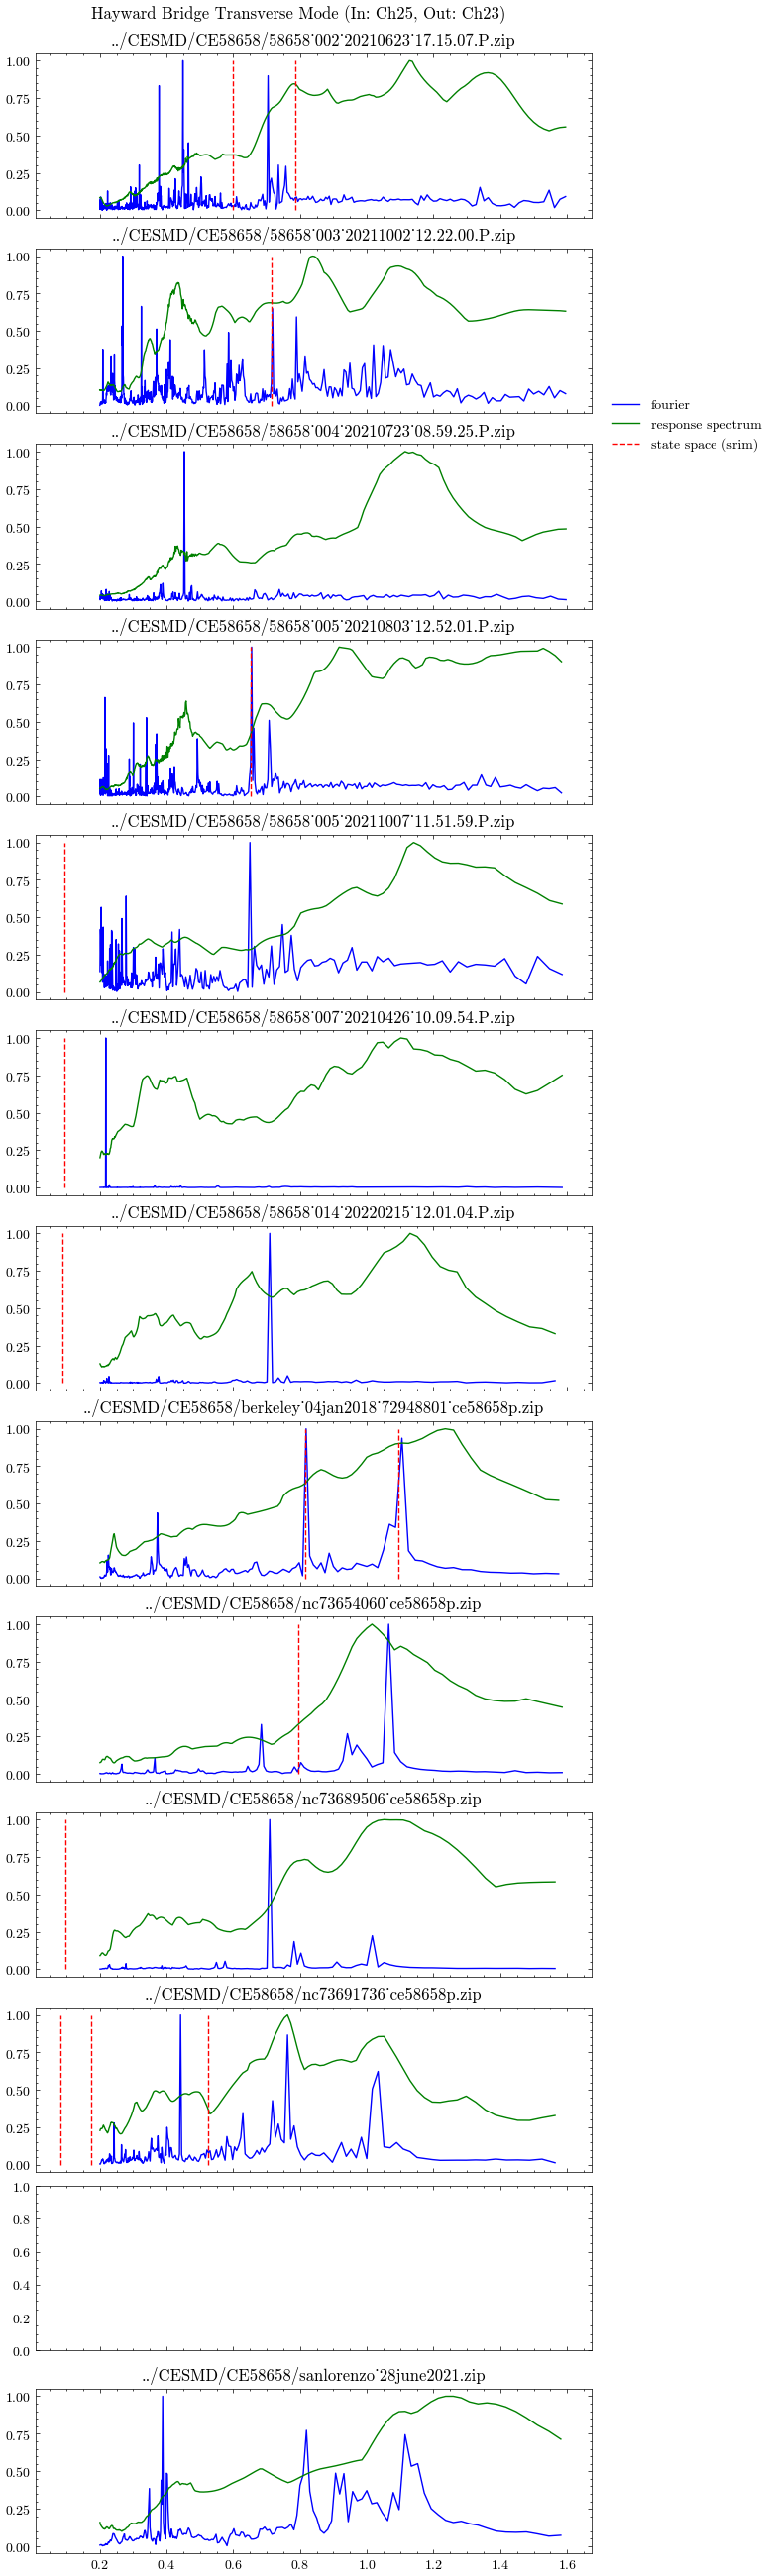

In [6]:
files = list(list_files(directory, pattern))
# event_names = ["Berkeley", "San Lorenzo"]
event_names = [str(file) for file in files]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
axi = iter(axs)

method = "srim"

for i, file in enumerate(files):
    ax = next(axi)
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf["inputs"])
        outpts, dt = extract_channels(event, data_conf["outputs"])
        conf.decimation = 8 # decimation factor
        realization = ssid.system(method=method, inputs=inputs, outputs=outpts, **conf)
    except Exception as e:
        # raise e
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,conf["decimation"],nt=inputs.shape[1])
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["fourier" if i==0 else None][0], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["response spectrum" if i==0 else None][0], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=[f"state space ({method})" if i==0 else None][0])
    ax.set_title(event_names[i])
fig.legend(bbox_to_anchor=(1.3,0.85))
event_frequencies = mode_statistics(event_modes, "freq")
fig.suptitle(title)